In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
dataset.head(50)

In [ ]:
dataset.tail(20)

In [ ]:
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset.groupby(['order_month', 'brand'])['gmv'].sum().unstack()

In [ ]:
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='blue', marker='.', linewidth=1)
plt.title('Jumlah Pembeli Harian Bulan December 2019', loc='center', pad=30, fontsize=15, color='black')
plt.xlabel('Tanggal Order', fontsize=10, color='black')
plt.ylabel('Jumlah Customer', fontsize=10, color='black')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)

In [30]:
#case 1 - 5 top brand bulan Desember 2019
# Buat variabel untuk top 5 brands berdasarkan quantity
brands_top5 = (dataset[dataset['order_month']=='2019-12'].groupby(['brand'])['quantity']
.sum()
.reset_index()
.sort_values(by='quantity', ascending=False)
.head (5))
print(brands_top5)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


In [42]:
#case 1 membuat variabel baru dengan nama dataset_top5brands_dec
dataset_top5brands_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(brands_top5['brand'].to_list()))]
print(dataset_top5brands_dec.head())

    order_id  order_date  customer_id             city     province  \
8    1741846  2019-12-30        16873    Jakarta Barat  DKI Jakarta   
14   1734790  2019-12-18        17422  Jakarta Selatan  DKI Jakarta   
19   1731961  2019-12-13        13880            Bogor   Jawa Barat   
35   1741561  2019-12-29        13521          Bandung   Jawa Barat   
38   1735633  2019-12-19        17096  Jakarta Selatan  DKI Jakarta   

   product_id    brand  quantity  item_price order_month       gmv brand_top  
8       P3203  BRAND_S        32      450000     2019-12  14400000   BRAND_S  
14      P0122  BRAND_A        12      695000     2019-12   8340000     other  
19      P2853  BRAND_R         6      740000     2019-12   4440000   BRAND_R  
35      P3344  BRAND_S         2      520000     2019-12   1040000   BRAND_S  
38      P3285  BRAND_S         4     1325000     2019-12   5300000   BRAND_S  


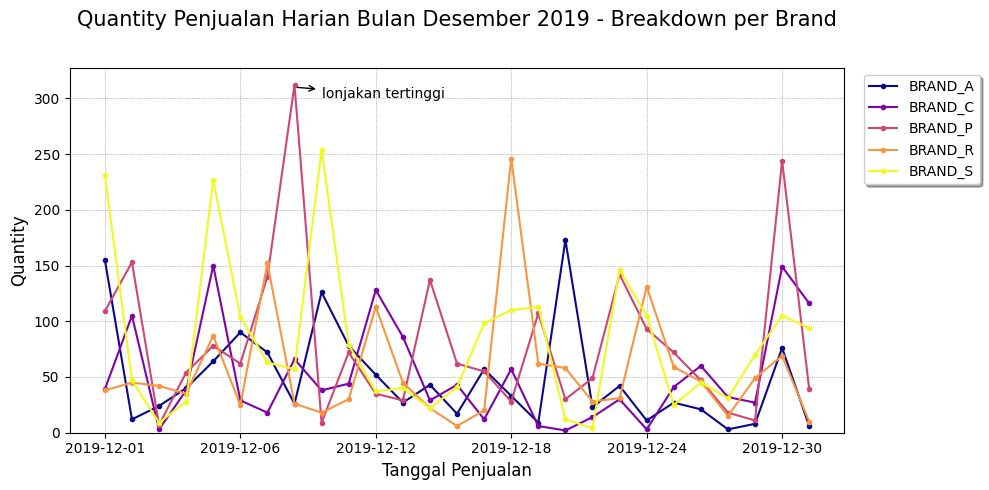

In [49]:
#case 2 membuat multichart daily quantity untuk brand top 5
#data untuk multichart
import matplotlib.pyplot as plt
dataset_top5brands_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.',cmap='plasma')
#membentuk multichart
plt.title('Quantity Penjualan Harian Bulan Desember 2019 - Breakdown per Brand', loc='center', pad=30, fontsize=15, color='black')
plt.xlabel('Tanggal Penjualan', fontsize = 12)
plt.ylabel('Quantity', fontsize = 12)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1,1), shadow=True, ncol=1)
plt.annotate('lonjakan tertinggi', xy=(7,310), xytext=(8,300), color='black', arrowprops=dict(arrowstyle='<-',connectionstyle='arc3',color='black'))
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

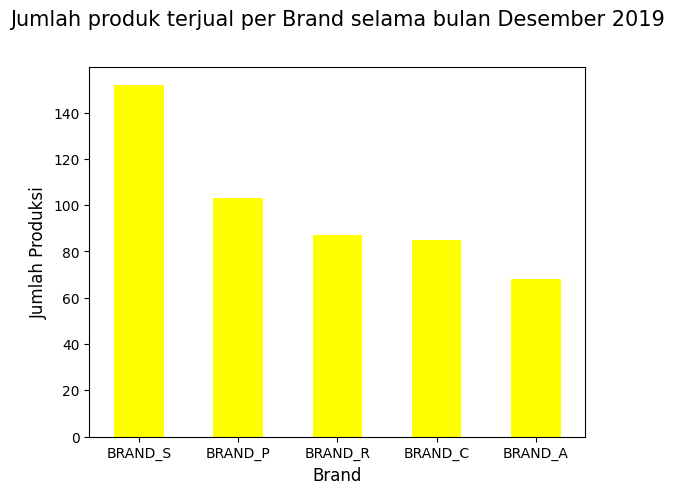

In [51]:
#case 3 mencari jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019
#membuat barchart
import matplotlib.pyplot as plt
plt.clf()
dataset_top5brands_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='yellow')
plt.title('Jumlah produk terjual per Brand selama bulan Desember 2019', loc='center', pad=30, fontsize=15, color='black')
plt.xlabel('Brand', fontsize = 12)
plt.ylabel('Jumlah Produk', fontsize = 12)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

       brand product_id  quantity quantity_group
58   BRAND_A      P0255       258         >= 100
465  BRAND_S      P3534       234         >= 100
238  BRAND_P      P2770       216         >= 100
245  BRAND_P      P2790       185         >= 100
186  BRAND_P      P2489       170         >= 100
..       ...        ...       ...            ...
240  BRAND_P      P2774         1          < 100
222  BRAND_P      P2677         1          < 100
221  BRAND_P      P2666         1          < 100
214  BRAND_P      P2587         1          < 100
494  BRAND_S      P3666         1          < 100

[495 rows x 4 columns]


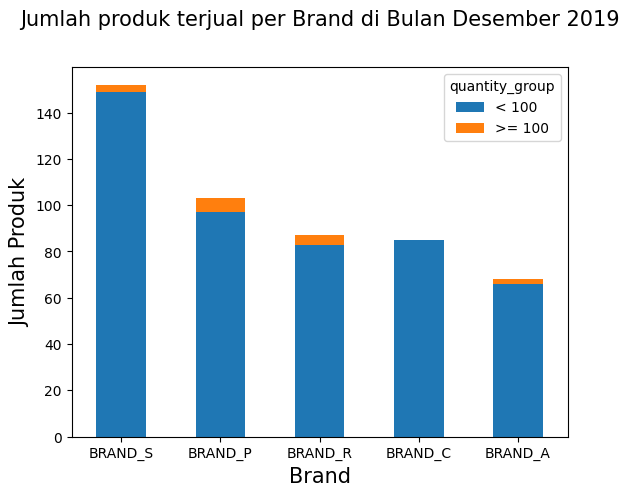

In [58]:
#case 4
#membuat dataframe baru
dataset_top5brands_dec_per_product = dataset_top5brands_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()
#membuat kolom baru untuk menandai produk yang terjual lebih dari 100 dan kurang dari 100
dataset_top5brands_dec_per_product['quantity_group'] = dataset_top5brands_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brands_dec_per_product.sort_values('quantity',ascending=False,inplace=True)
print(dataset_top5brands_dec_per_product)
#membuat pengurutan brand berdasakan banyaknya semua produk
s_sort = dataset_top5brands_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)
#plot stacked bar-chart
dataset_top5brands_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index,level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Jumlah produk terjual per Brand di Bulan Desember 2019',loc='center', pad=30, fontsize=15, color='black')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Jumlah Produk', fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

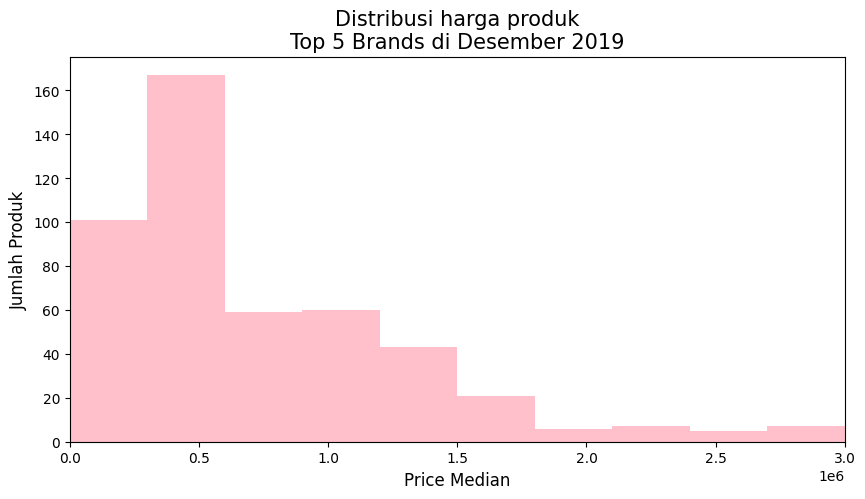

In [60]:
#case 5 menggunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brands_dec.groupby('product_id')['item_price'].median(), bins=10,stacked=True, range=(1,3000000), color='pink')
plt.title('Distribusi harga produk\nTop 5 Brands di Desember 2019', fontsize=15, color='black')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Jumlah Produk', fontsize = 12)
plt.xlim(xmin=0,xmax=3000000)
plt.show()

([<matplotlib.axis.YTick at 0x7f07d758a8c0>,
 [Text(0, 0.0, '0'),
  Text(0, 50000000.0, '50'),
  Text(0, 100000000.0, '100'),
  Text(0, 150000000.0, '150'),
  Text(0, 200000000.0, '200'),
  Text(0, 250000000.0, '250'),
  Text(0, 300000000.0, '300')])

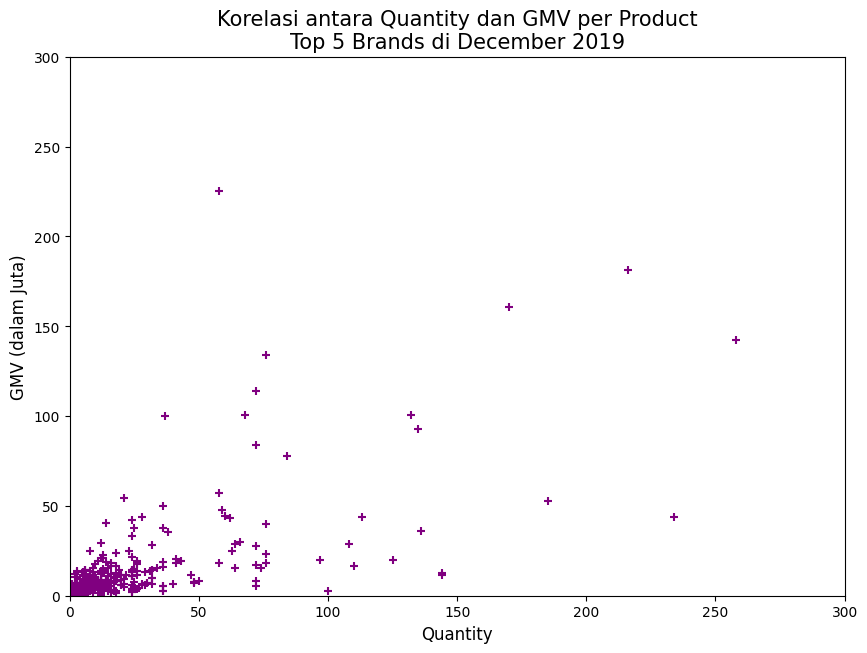

In [63]:
#case 6a
#agrerat per product
data_per_product_top5brands_dec = dataset_top5brands_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
#scatter plot
plt.figure(figsize=(10,7))
plt.scatter(data_per_product_top5brands_dec['quantity'],data_per_product_top5brands_dec['gmv'], marker='+', color='purple')
plt.title('Korelasi antara Quantity dan GMV per Product\nTop 5 Brands di December 2019',fontsize=15, color='black')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (dalam Juta)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=300000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))


(0.0, 350.0)

<Figure size 640x480 with 0 Axes>

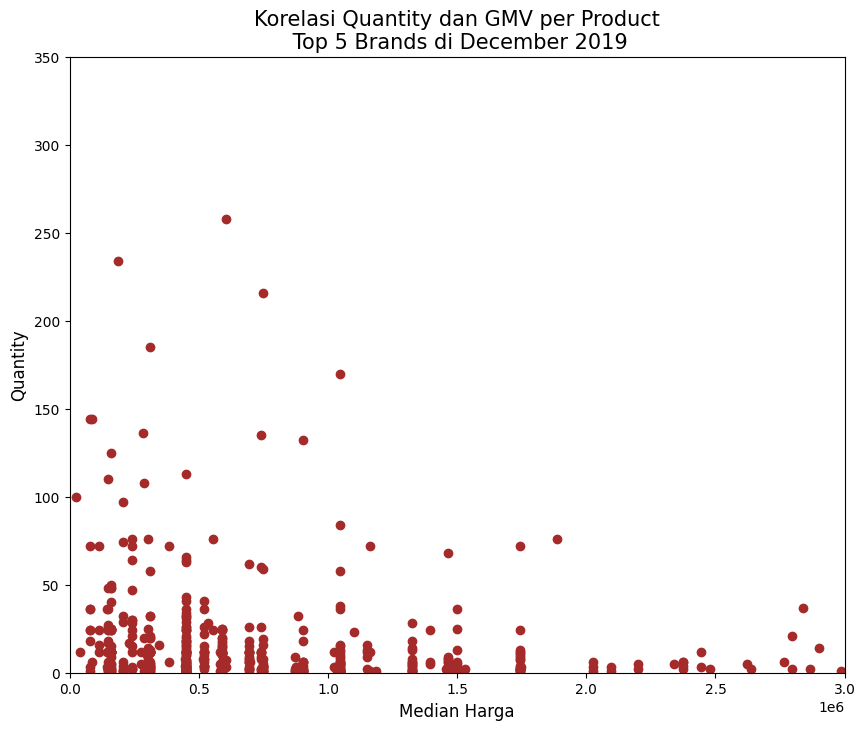

In [65]:
#case 6b korelasi median harga vs quantity
import matplotlib.pyplot as plt
plt.clf()
#agregat per product
data_per_product_top5brands_dec = dataset_top5brands_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brands_dec['item_price'],data_per_product_top5brands_dec['quantity'], marker='o', color='brown')
plt.title('Korelasi Quantity dan GMV per Product\n Top 5 Brands di December 2019',fontsize=15, color='black')
plt.xlabel('Median Harga', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=3000000)
plt.ylim(ymin=0,ymax=350)